## EDA

In [9]:
import pandas as pd

df = pd.read_csv("Data/cardio_train.csv", sep=";")

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print(df.info())
print(f"duplicates: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
duplicates: 0


In [ ]:
# How many are positive for heart disease vs negative?

print(df["cardio"].value_counts(), end="\n\n")

# Just making things more clear.
not_heart_disease, heart_disease = df["cardio"].value_counts() # potential bug inconsistent sorting?
print(f"Not heart disease: {not_heart_disease}\nHeart disease: {heart_disease}")
print(f"p(heart_disease): {heart_disease/(heart_disease + not_heart_disease)}")

cardio
0    35021
1    34979
Name: count, dtype: int64

Not heart disease: 35021
Heart disease: 34979
p(heart_disease): 0.4997


In [ ]:
# proportion of normal, above normal, outlier cholesterol values? Draw pie chart. (cake?)
# age distribution? histogram
# proportion of smokers?
# weight distribution? use correct diagram.
# length distribution?
# percentage male vs female cardiovascular disease?

cholesterol
Normal               0.748357
Above normal         0.136414
Well above normal    0.115229
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x7f73e02a4590>,
 [Text(-0.7818216731194174, -0.7737925248028408, 'Normal'),
  Text(1.0051877233655782, 0.4467635177531021, 'Above normal'),
  Text(0.38956096558345765, 1.0287090230447502, 'Well above normal')])

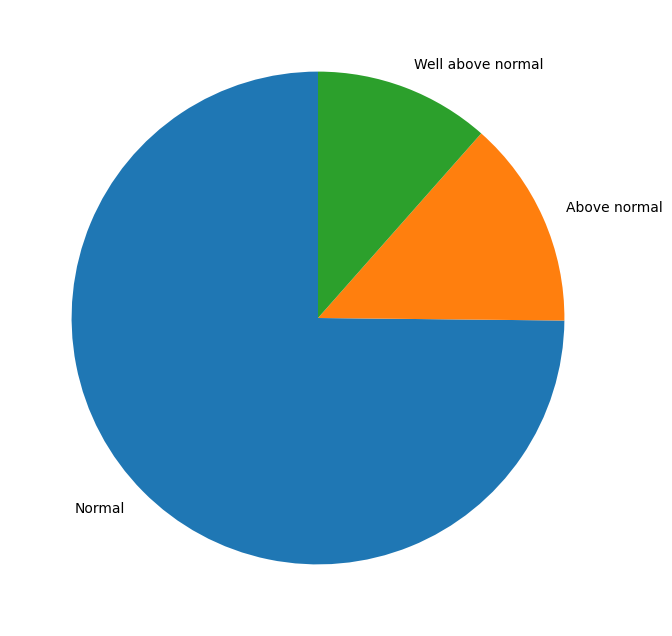

In [ ]:
# proportion of normal, above, well above cholesterol values?

import matplotlib.pyplot as plt

cholesterol_proportions = df["cholesterol"].value_counts(normalize=True)

cholesterol_labels = {1: "Normal", 2: "Above normal", 3: "Well above normal"}

labelled_proportions = cholesterol_proportions.rename(index=cholesterol_labels)
print(labelled_proportions)

plt.figure(figsize=(8, 8))
plt.pie(labelled_proportions, labels=labelled_proportions.index, startangle=90)

# I should get my git workflow back on track and just pretend I'm actually in a group project as review/relearn.


